# Imports & Installs

In [306]:
# !pip install mne
# !pip install autoreject
# !pip install pyxdf

In [307]:
import os
import warnings
import numpy as np
import pandas as pd
from scipy.io import loadmat
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [308]:
import mne
from mne.preprocessing import ICA

In [309]:
from autoreject import AutoReject

In [310]:
import pyxdf

In [311]:
warnings.filterwarnings('ignore', category=RuntimeWarning)
mne.set_log_level('WARNING')

# Manipulated Variables

In [312]:
# Variables I don't want to work with
# LL 42 12
# LH 43 13
# HL 44 14
# HH 46 16
cond = "LL"
cond_start = 42
cond_end = 12

In [313]:
# Variables I want to work with
# Baseline for these participants were hard coded - Future experiments will use baseline if provided else the default LSL value (200-210)
file_pairs = [
    # Participant Number, EEG Data, LSL Data, Baseline
    ("P01", "Dataset/P01/sub-P001_ses-S001_task-Default_run-001_eeg.xdf", "Dataset/P01/P01events_data.csv"),
    ("P07", "Dataset/P07/sub-P007_ses-S001_task-Default_run-001_eeg (1).xdf", "Dataset/P07/P07events_data.csv")
]

regions = {
    'Frontal': ['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC3', 'FC5', 'ACC_X', 'ACC_Y', 'ACC_Z'],
    'Central': ['C3', 'Cz'],
    'Parietal': ['P3', 'P4', 'Pz'],
    'Occipital': ['O1', 'O2'],
}

# TASK: Update Step numbers

# TASK: Loop conditions 42/12

# TASK: Exchange .mat for 1020
# Shit. So the numbers used for the study did not have accurate spatial montage location due to fake numbers in .mat. 
# For now the .mat stuff stays but only to verify consistency with the rest of the script.
# Once ready, the .mat script will get replaced with standard 1020 montage locations instead of custom coordinates

Processing P01 as Dataset/P01/sub-P001_ses-S001_task-Default_run-001_eeg.xdf with Dataset/P01/P01events_data.csv
{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Jan 15 12:32:34 2025', '__version__': '1.0', '__globals__': [], 'Channel': array([[(array(['Fz  ', 'Cz  ', 'Pz  ', 'Acc1', 'Acc2', 'Acc3'], dtype='<U4'), array([[0.1, 0. , 0. ],
               [0.2, 0.1, 0. ],
               [0.3, 0.2, 0. ],
               [0. , 0.1, 0.2],
               [0. , 0.2, 0.3],
               [0. , 0.3, 0.4]]))                                                                     ]],
      dtype=[('Name', 'O'), ('Loc', 'O')])}
['Fz', 'Cz', 'Pz', 'Acc1', 'Acc2', 'Acc3']
{'names': ['Fz', 'Cz', 'Pz', 'Acc1', 'Acc2', 'Acc3'], 'locs': array([[0.1, 0.2, 0.3],
       [0. , 0.1, 0.2],
       [0. , 0. , 0. ]])}
Starting processing pipeline...

Step 0: Loading .xdf file...
sfreq: 250.0
Channel names: ['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'ACC_X', 'ACC_Y', 'ACC_Z']
LOOK HERE FOR

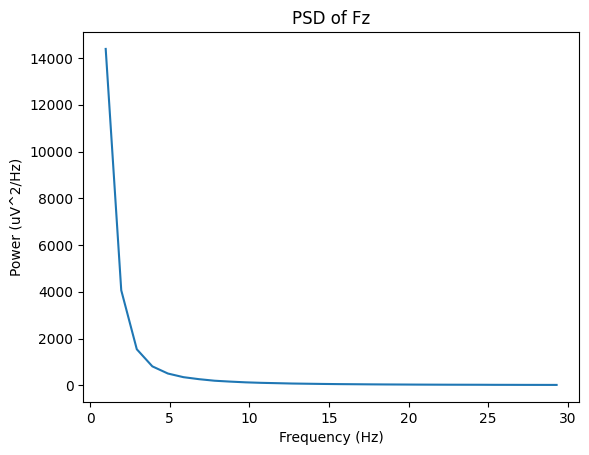


Finalizing gamma table for train...
Finalized gamma table saved to 'GammaResults2/P01/LL_log_z_gamma_power_train.csv'.
Averaged gamma power (log_z) saved to 'GammaResults2/P01/LL_avg_log_z_gamma_power_train.csv'.

Computing FFT for train...
FFT results saved to 'GammaResults2/P01/LL_fft_train.csv'.

Computing band averages for train...
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
Band averages saved to 'GammaResults2/P01/LL_band_averages_train.csv'.

Step 3: Applying baseline correction...
Detecting rest intervals from markers...
Using detected rest interval for baseline correction: Start=60, End=61
Baseline correction using rest interval applied successfully.
Saving baseline-corrected file to 'GammaResults2/P01/fif/LL_D_bc.fif'...

Step 4: Applying ICA...
[0 1 2]
Found EOG component

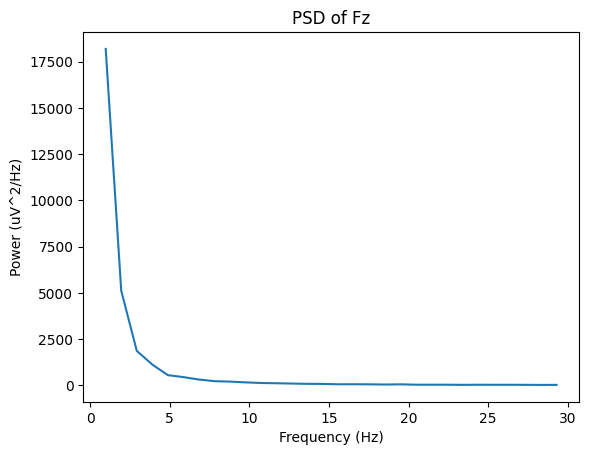


Finalizing gamma table for test...
Finalized gamma table saved to 'GammaResults2/P01/LL_log_z_gamma_power_test.csv'.
Averaged gamma power (log_z) saved to 'GammaResults2/P01/LL_avg_log_z_gamma_power_test.csv'.

Computing FFT for test...
FFT results saved to 'GammaResults2/P01/LL_fft_test.csv'.

Computing band averages for test...
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
Band averages saved to 'GammaResults2/P01/LL_band_averages_test.csv'.
Processing P07 as Dataset/P07/sub-P007_ses-S001_task-Default_run-001_eeg (1).xdf with Dataset/P07/P07events_data.csv
{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Jan 15 12:32:34 2025', '__version__': '1.0', '__globals__': [], 'Channel': array([[(array(['Fz  ', 'Cz  ', 'Pz  ', 'Acc1', 'Acc2', 'Acc3'], dtype='<U4'), array(

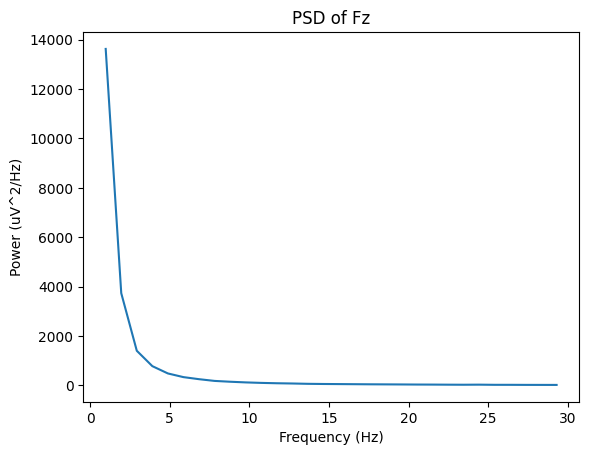


Finalizing gamma table for train...
Finalized gamma table saved to 'GammaResults2/P07/LL_log_z_gamma_power_train.csv'.
Averaged gamma power (log_z) saved to 'GammaResults2/P07/LL_avg_log_z_gamma_power_train.csv'.

Computing FFT for train...
FFT results saved to 'GammaResults2/P07/LL_fft_train.csv'.

Computing band averages for train...
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
Band averages saved to 'GammaResults2/P07/LL_band_averages_train.csv'.

Step 3: Applying baseline correction...
Detecting rest intervals from markers...
Using detected rest interval for baseline correction: Start=86, End=87
Baseline correction using rest interval applied successfully.
Saving baseline-corrected file to 'GammaResults2/P07/fif/LL_D_bc.fif'...

Step 4: Applying ICA...
[0 1 2]
Found EOG component

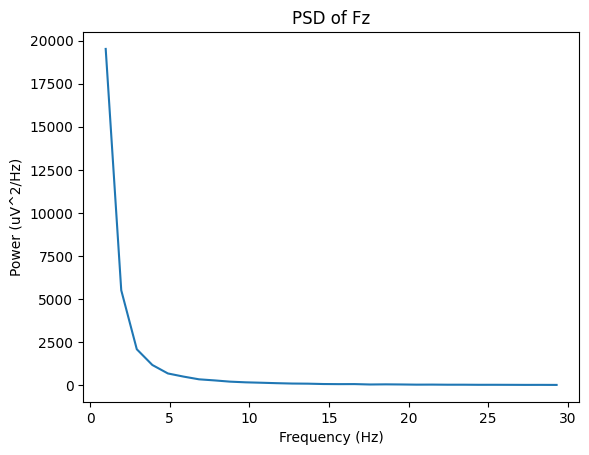


Finalizing gamma table for test...
Finalized gamma table saved to 'GammaResults2/P07/LL_log_z_gamma_power_test.csv'.
Averaged gamma power (log_z) saved to 'GammaResults2/P07/LL_avg_log_z_gamma_power_test.csv'.

Computing FFT for test...
FFT results saved to 'GammaResults2/P07/LL_fft_test.csv'.

Computing band averages for test...
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
No channels found for region Occipital. Skipping.
Band averages saved to 'GammaResults2/P07/LL_band_averages_test.csv'.


In [314]:
# TASK: Review Imports
import os
import warnings
import numpy as np
import pandas as pd
from scipy.io import loadmat
import mne
from autoreject import AutoReject
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
import pyxdf
from scipy.stats import ttest_ind

class EEGProcessor:

    def __init__(self, set_file, marker_csv, participant, channel_mat, fixed_channels, prestim, poststim):
        """
        Initializes the EEGProcessor object for preprocessing EEG data and computing 
        various signal metrics (e.g., PSD, FFT, band power, gamma ratios).

        Parameters:
        - set_file (str): Path to the EEG .xdf file containing the recorded signal.
        - marker_csv (str): Path to the .csv file with event markers, containing at least 'time' and 'value' columns.
        - participant (str): Identifier for the current participant, used in saving output files.
        - channel_mat (str): Path to the .mat file containing channel names and 3D positions.
                             Note: Often used to extract accelerometer or legacy channel info.
        - fixed_channels (list of str): List of expected original channel labels to guide renaming, 
                                        rejection, or validation across participants.
        - prestim (int): Duration in milliseconds before stimulus onset to include in epochs.
        - poststim (int): Duration in milliseconds after stimulus onset to include in epochs.

        Notes:
        - prestim and poststim are converted from milliseconds to seconds by dividing by 1000.
        - Internal data structures are initialized for holding sampling frequency, event timestamps, 
          trial metadata, and processed epoch objects.
        """
        
        # Participant specific
        self.set_file = set_file
        self.marker_df = pd.read_csv(marker_csv)
        self.participant = participant
        
        # Montage specific
        self.channel_info = self._load_channel_info(channel_mat)
        print(self.channel_info)
        self.fixed_channels = fixed_channels
        
        # EEG analysis specific
        self.prestim = prestim / 1000
        self.poststim = poststim / 1000
        
        # Data structures for storage
        self.sfreq = None
        self.condition_timestamps = {}
        self.trials = []
        self.trl = []
        self.participant_ratios = []
        self.epochs_train = None
        self.epochs_test = None

    # REMOVE
    def _load_channel_info(self, channel_mat):
        mat_data = loadmat(channel_mat) # Loads the .mat file with the 6 channels
        print(mat_data)
        # channel_names = [str(mat_data['Channel']['Name'][0][i][0]) for i in range(mat_data['Channel']['Name'].shape[1])] # Extracts the channel names from a matlab file and saves in a []
        channel_names = ["Fz", "Cz", "Pz", "Acc1", "Acc2", "Acc3"]
        print(channel_names)
        channel_locs = np.array([mat_data['Channel']['Loc'][0][i][:3] for i in range(mat_data['Channel']['Loc'].shape[1])]).squeeze().T # Extract channel locations and compresses into x,y,z for further analysis
        return {'names': channel_names, 'locs': channel_locs} # Creates a dictionary for the channel names with their associated locations

    def load_set(self):
        """
        Loads and preprocesses EEG data from a .xdf file using MNE.

        This method performs the following:
        - Loads EEG data from the provided .xdf file using pyxdf.
        - Extracts channel names, sampling frequency, and time-series data.
        - Drops unused or undesired channels (e.g., F7, F9, FC5, FC1, C3).
        - Renames select EEG channels based on an external .mat file or expected layout.
        - Applies a custom montage based on provided or standard channel coordinates.
        - Assigns channel types (EEG vs. accelerometer).
        - Resamples the signal to 250 Hz.
        - Applies a bandpass filter (0.1–30 Hz) to EEG channels.

        Returns:
        - raw (mne.io.Raw): A preprocessed Raw EEG object ready for further processing.

        Parameters used:
        - self.set_file: Path to the .xdf EEG recording file.
        - self.channel_info: Contains channel names and 3D positions (from .mat file).
        - self.fixed_channels: Expected list of original channel names (for reference or validation).

        Disclaimer:
        --------------------
        Much of the current logic relies on the structure and content of a provided `.mat` file.
        Once the `.mat` file is deprecated or replaced with standardized naming/position data,
        several sections of this method (especially channel renaming and montage assignment)
        will be updated to use direct standard mappings or skip `.mat`-based adjustments entirely.
        """
        
        print("\nStep 0: Loading .xdf file...")

        # Load the .xdf file
        streams, _ = pyxdf.load_xdf(self.set_file)

        # Find the EEG stream
        eeg_stream = next((s for s in streams if s['info']['type'][0].lower() == 'eeg'), None)
        if eeg_stream is None:
            raise ValueError("No EEG stream found in the XDF file.")

        # Extract data and sampling frequency
        data = np.array(eeg_stream['time_series']).T
        try:
            sfreq = float(eeg_stream['info']['sample_rate'][0])
        except:
            sfreq = 250.0
        print(f'sfreq: {sfreq}')

        # Extract channel names
        try:
            ch_names = [chan['label'][0] for chan in eeg_stream['info']['desc'][0]['channels'][0]['channel']]
        except:
            ch_names = [f"Ch{i+1}" for i in range(data.shape[0])]
        print(f'Channel names: {ch_names}') # 11 original
        
        # # ADD
        # # Expected input channels from .xdf
        # expected_channels = ['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'ACC_X', 'ACC_Y', 'ACC_Z']
        # # Keep only: Fp1, Fz, F3, ACC_X, ACC_Y, ACC_Z
        # keep_channels = ['Fp1', 'Fz', 'F3', 'ACC_X', 'ACC_Y', 'ACC_Z']
        # drop_channels = [ch for ch in ch_names if ch not in keep_channels]

        # Create MNE Info and Raw objects
        info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=['eeg'] * len(ch_names))
        raw = mne.io.RawArray(data, info)
        
        # # ADD
        # # Drop unwanted channels
        # if drop_channels:
        #     print(f"Dropping channels: {drop_channels}")
        #     raw.drop_channels(drop_channels)
        # # Rename Fp1 → Fz, Fz → Cz, F3 → Pz
        # rename_map = {
        #     'Fp1': 'Fz',
        #     'Fz': 'Cz',
        #     'F3': 'Pz'
        # }
        # raw.rename_channels(rename_map)
        # # Set channel types
        # eeg_channels = ['Fz', 'Cz', 'Pz']
        # acc_channels = ['ACC_X', 'ACC_Y', 'ACC_Z']
        # channel_types = {ch: 'eeg' for ch in eeg_channels}
        # channel_types.update({ch: 'misc' for ch in acc_channels})
        # raw.set_channel_types(channel_types)
        # # Apply standard 10-20 montage to the renamed EEG channels
        # standard_montage = mne.channels.make_standard_montage('standard_1020')
        # # Create a custom montage using only the EEG channels you renamed
        # selected_pos = {k: v for k, v in standard_montage.get_positions()['ch_pos'].items() if k in eeg_channels}
        # montage_subset = mne.channels.make_dig_montage(ch_pos=selected_pos, coord_frame='head')
        # # Apply the partial montage
        # raw.set_montage(montage_subset, on_missing='ignore')

        # REMOVE
        # Handle channel names from .mat file
        ch_names_from_mat = self.channel_info['names']
        print(f"LOOK HERE FOR THE CHANNEL NAMES: {ch_names_from_mat}") # 6 updated
        if len(raw.ch_names) != len(ch_names_from_mat):
            # if len(raw.ch_names) < len(ch_names_from_mat):
            #     ch_names_from_mat = ch_names_from_mat[:len(raw.ch_names)]
            # elif len(raw.ch_names) > len(ch_names_from_mat):
            #     raw.drop_channels(raw.ch_names[len(ch_names_from_mat):])

            # Jay changed here because ch_names will always have the original 11
            # ch_names_from_mat will always have the desired 6 channels
            # NOTE they haven't been renamed yet
            # Find channels in raw that are not in the .mat file
            channels_to_drop = ['F7', 'F9', 'FC5', 'FC1', 'C3']
            # Drop channels not in the .mat file
            if channels_to_drop:
                print(f"Dropping channels: {channels_to_drop}")
                raw.drop_channels(channels_to_drop)

        # Rename channels and set montage
        raw.rename_channels({raw.ch_names[i]: ch_names_from_mat[i] for i in range(len(raw.ch_names))})
        montage = mne.channels.make_dig_montage(ch_pos=dict(zip(ch_names_from_mat, self.channel_info['locs'].T)))

        # Jay: Now that all the channels are actually added in, we need to set acc and eeg differently
        channel_types = {ch: 'eeg' for ch in ['Fz', 'Cz', 'Pz']}
        channel_types.update({ch: 'misc' for ch in ['Acc1', 'Acc2', 'Acc3']})
        raw.set_channel_types(channel_types)

        raw.set_montage(montage)

        print("\nStep 0.1: Downsampling to 250 Hz...")
        raw.resample(250)

        print("\nStep 0.2: Applying bandpass filter (0.1 Hz to 30 Hz)...")
        raw.filter(l_freq=0.1, h_freq=30, picks='eeg')

        print("EEG data successfully loaded and preprocessed.")
        return raw

    def extract_event_windows(self, raw):
        """
        Extracts and segments the raw EEG data into training and test periods based on event markers.

        This method:
        - Loads and cleans event marker data from the provided marker CSV (must contain 'time' and 'value').
        - Identifies specific start and end events (currently hardcoded to event codes 42 and 12).
        - Crops the raw EEG signal into two segments: training and test periods.
        - Saves the segmented EEG files and logs their durations.
        - Stores condition timestamps and trial-level metadata to CSV files for further analysis.

        Parameters:
        - raw (mne.io.Raw): The loaded and preprocessed raw EEG object.

        Returns:
        - raw_training (mne.io.Raw | None): Cropped raw EEG data for the training window.
        - raw_test (mne.io.Raw | None): Cropped raw EEG data for the test window.

        Outputs:
        - Saves training and test `.fif` files to `GammaResults2/{participant}/fif/`
        - Writes `*_condition_timestamps.csv` and `*_trials.csv` files to `GammaResults2/{participant}/`

        Disclaimer:
        --------------------
        This method currently contains hardcoded logic specific to event codes 42 (condition start) 
        and 12 (condition end). Future updates should generalize this to loop through multiple 
        condition types dynamically. If you plan to support more complex or condition-specific 
        marker structures, this method will need significant refactoring.
        """

        print("\nStep 2: Extracting event windows for 'training' and 'test' periods...")

        # Prepare CSV
        if 'time' not in self.marker_df.columns or 'value' not in self.marker_df.columns:
            raise KeyError("The CSV file must contain 'time' and 'value' columns.")
        self.marker_df['value'] = pd.to_numeric(self.marker_df['value'], errors='coerce').dropna().astype(int)
        self.marker_df['time'] = pd.to_numeric(self.marker_df['time'], errors='coerce').dropna()
        self.marker_df = self.marker_df.dropna(subset=['time', 'value']).reset_index(drop=True)

        # Pull LSL from CSV
        events = self.marker_df['value']
        print(self.marker_df['value'])
        times = self.marker_df['time']

        # Extract indices of specific event markers
        event_42_indices = [i for i, event in enumerate(events) if event == cond_start]
        print(events[event_42_indices[0]])
        event_12_indices = [i for i, event in enumerate(events) if event == cond_end]

        if len(event_42_indices) < 7 or len(event_12_indices) < 7:
            print("Insufficient markers for training or test period.")
            print(f'Length of 42/46 indices: {len(event_42_indices)}')
            print(f'Length of 12/16 indices: {len(event_12_indices)}')
            return None, None

        training_start = times[event_42_indices[0]]  # First "42"
        print(f'Actual training start: {training_start}')
        training_end = times[event_12_indices[5]]  # 6th "12"
        print(f'Actual training end: {training_end}')
        test_start = times[event_42_indices[-1]]  # Last "42"
        test_end = times[event_12_indices[-1]]  # Last "12"

        # Crop raw data for training and test periods
        # Jay: some clarification on what is happening here
        # Jay: Crop works with seconds. So taking the start sample / frequency provides seconds
        # Jay: Crops then copies the data from that start and end section
        raw_training = raw.copy().crop(tmin=training_start, tmax=training_end) if training_start < training_end else None
        raw_test = raw.copy().crop(tmin=test_start, tmax=test_end) if test_start < test_end else None

        # Save cropped data
        if raw_training:
            training_file = f"GammaResults2/{participant}/fif/{cond}_training_data.fif"
            raw_training.save(training_file, overwrite=True)
            print(f"Training data saved to '{training_file}'")
        else:
            print("Invalid training period duration.")

        if raw_test:
            test_file = f"GammaResults2/{participant}/fif/{cond}_test_data.fif"
            raw_test.save(test_file, overwrite=True)
            print(f"Test data saved to '{test_file}'")
        else:
            print("Invalid test period duration.")

        # Log durations
        if raw_training:
            print(f"Training data duration: {(training_end - training_start)} seconds")

        if raw_test:
            print(f"Test data duration: {(test_end - test_start)} seconds")

        # Save condition timestamps
        condition_timestamps = {
            'training_start': training_start,
            'training_end': training_end,
            'test_start': test_start,
            'test_end': test_end,
        }
        
        self.condition_timestamps = condition_timestamps
        pd.DataFrame([condition_timestamps]).to_csv(f"GammaResults2/{participant}/{cond}_condition_timestamps.csv", index=False)
        print(f"Condition timestamps saved to 'GammaResults2/{participant}/{cond}_condition_timestamps.csv'.")

        trials = []

        # Loop through each pair of 42 and 12
        for i, start_index in enumerate(event_42_indices):
            if i < len(event_12_indices):  # Ensure there's a corresponding "12" index
                end_index = event_12_indices[i]

                # Determine condition based on whether it's the last 42/12 pair
                condition = 'train' if i < len(event_42_indices) - 1 else 'test'

                # Add data for both the start (42) and end (12) events
                trials.append({'event_type': events[start_index], 'sample_idx': start_index, 'time': times[start_index], 'condition': condition})
                trials.append({'event_type': events[end_index], 'sample_idx': end_index, 'time': times[end_index], 'condition': condition})

        # Handle last 42/12 pair for test condition (if required)
        if len(event_42_indices) > len(event_12_indices):
            last_start_index = event_42_indices[-1]
            trials.append({'event_type': events[last_start_index], 'sample_idx': last_start_index, 'time': times[last_start_index], 'condition': 'test'})

        # Create a DataFrame and save to CSV
        trials_df = pd.DataFrame(trials)
        trials_df.to_csv(f"GammaResults2/{participant}/{cond}_trials.csv", index=False)

        print(f"Trials saved to 'GammaResults2/{participant}/{cond}_trials.csv'.")

        return raw_training, raw_test

    def epoch_data(self, raw, type, duration=1.0, overlap=0.0):
        """
        Segments the raw EEG data into fixed-length epochs for a specified condition (e.g., train/test).

        This method:
        - Uses `mne.make_fixed_length_events` to generate evenly spaced events from the raw recording.
        - Creates epochs based on these events, each of specified `duration` (in seconds).
        - Saves metadata about each epoch (start/end time, number of samples, event type) to a CSV file.

        Parameters:
        - raw (mne.io.Raw): Preprocessed raw EEG data to segment.
        - type (str): A label to distinguish the epoch type (e.g., 'train' or 'test').
        - duration (float): Length of each epoch in seconds. Default is 1.0.
        - overlap (float): Overlap between consecutive epochs in seconds. Must be < `duration`.

        Returns:
        - epochs (mne.Epochs | None): The resulting MNE Epochs object. Returns None if no epochs were generated or an error occurred.

        Outputs:
        - CSV file saved as `GammaResults2/{participant}/{cond}_epoch_trl_{type}.csv`
          containing columns: ['start', 'end', 'samples', 'type'] for each generated epoch.

        Notes:
        - Epochs are generated from the entire raw signal range ([start, stop]) using fixed intervals.
        - The `participant` and `cond` variables must be defined externally (likely as instance or global variables).
        - Overlap must be strictly less than `duration`, or an exception is raised.
        """
        
        print("\nStep 2: Epoching data...")
        start = 0
        stop = raw.n_times / raw.info['sfreq']
        
        temp = raw.info['sfreq']
        print(f'Raw n times: {raw.n_times}')
        print(f'Raw info sfreq: {temp}')
        print(f"Raw data range: Start={start}, Stop={stop}, Duration={duration}, Overlap={overlap}")

        try:
            if overlap >= duration:
                raise ValueError(f"Overlap must be >=0 but < duration ({duration}), got {overlap}")

            events = mne.make_fixed_length_events(
                raw, id=1, start=start, stop=stop, duration=duration, overlap=overlap
            )
            print(f"Generated {len(events)} fixed-length events.")
        except ValueError as e:
            print(f"Error generating events: {e}")
            return None

        if len(events) == 0:
            print("No fixed-length events created.")
            return None

        epochs = mne.Epochs(
            raw, events, tmin=0, tmax=duration, baseline=None, detrend=1, preload=True
        )

        # Save trial information
        trial_data = []
        for event in events:
            trial_info = {
                'start': event[0] / raw.info['sfreq'],
                'end': (event[0] + int(raw.info['sfreq'] * duration)) / raw.info['sfreq'],
                'samples': int(raw.info['sfreq'] * duration),
                'type': event[2]
            }
            self.trl.append(trial_info)
            trial_data.append(trial_info)

        # Save trial data to a CSV file
        trial_df = pd.DataFrame(trial_data)
        filename = f"GammaResults2/{participant}/{cond}_epoch_trl_{type}.csv"
        trial_df.to_csv(filename, index=False)
        print(f"Epoch trial data saved to '{filename}'.")

        return epochs

    def apply_baseline_correction(self, raw, rest_events=None):
        """
        Applies baseline correction using rest intervals if available or a default 15s baseline.
        """
        print("\nStep 3: Applying baseline correction...")
        sfreq = raw.info['sfreq']

        # Detect rest intervals from markers (202-212 and 203-213)
        # Jay: Brutal it is 200 to 210 for any and all rests
        print("Detecting rest intervals from markers...")
        # Jay: with channel removal - STI 014 isn't an option anymore - use marker_df
        # rest_events_detected = mne.find_events(raw, stim_channel='STI 014', shortest_event=1)
        # He automated the process here - why are we still using a hardcoded baseline window?
        # rest_start_event = [event[0] for event in rest_events_detected if event[2] in [202, 203]]
        # rest_end_event = [event[0] for event in rest_events_detected if event[2] in [212, 213]]
        rest_start_event = self.marker_df[self.marker_df['value'] == 200].index.tolist()
        rest_end_event = self.marker_df[self.marker_df['value'] == 210].index.tolist()

        # rest_start = rest_start_event[0] if rest_start_event else None
        # rest_end = rest_end_event[-1] if rest_end_event else None
        # Jay; Pass the index not the timestamp!
        rest_start = rest_start_event[0] if rest_start_event else None
        rest_end = rest_end_event[0] if rest_end_event else None

        # Verify the rest interval
        if rest_start is not None and rest_end is not None and rest_end > rest_start:
            print(f"Using detected rest interval for baseline correction: Start={rest_start}, End={rest_end}")
            try:
                raw.apply_function(
                    # lambda x: x - np.mean(x[:, rest_start:rest_end], axis=-1) # Jay: Incorrect dimensions! Baseline now correctly applied
                    lambda x: x - np.mean(x[:, rest_start:rest_end], axis=-1)[:, None],
                    picks='eeg', channel_wise=False
                )
                print("Baseline correction using rest interval applied successfully.")
            except Exception as e:
                print(f"Error applying baseline correction with rest interval: {e}") # Jay: Error applying baseline correction with rest interval: operands could not be broadcast together with shapes (3,72690) (3,)
                  # Sounds like it is due to a mismatch array dimensions
        else:
            if rest_start is None or rest_end is None:
                print("Warning: Rest interval markers not detected.")
            elif rest_end <= rest_start:
                print("Warning: Detected rest interval is invalid (end occurs before or at start).")

            # Fallback: Use default 15s baseline
            print("Falling back to default 15s baseline...")
            baseline_start = int(max(0, (raw.times[0] + 15) * sfreq))  # First 15 seconds of the recording
            baseline_end = int(max(0, raw.times[0] * sfreq))  # Start of the recording

            if baseline_end > baseline_start:
                print(f"Using default baseline: Start={baseline_start}, End={baseline_end}")
                try:
                    raw.apply_function(
                        lambda x: x - np.mean(x[:, baseline_start:baseline_end], axis=-1),
                        picks='eeg', channel_wise=False
                    )
                    print("Baseline correction using default interval applied successfully.")
                except Exception as e:
                    print(f"Error applying baseline correction with default interval: {e}")
            else:
                print("Error: Default baseline interval is invalid. Skipping baseline correction.")

        # Save the baseline-corrected file
        print(f"Saving baseline-corrected file to 'GammaResults2/{participant}/fif/{cond}_D_bc.fif'...")
        raw.save(f"GammaResults2/{participant}/fif/{cond}_D_bc.fif", overwrite=True)

        return raw

    def apply_autoreject(self, raw):
        """
        Applies the AutoReject algorithm to detect and repair noisy EEG segments.

        This method:
        - Segments the input `raw` data into fixed-length 2-second epochs.
        - Iteratively tests multiple consensus thresholds (1.0, 0.1, 0.5) for artifact repair.
        - Uses Bayesian optimization to determine rejection thresholds.
        - Repairs epochs without dropping channels and reconstructs a new `Raw` object.

        Parameters:
        - raw (mne.io.Raw): The raw EEG data to clean using AutoReject.

        Returns:
        - raw_clean (mne.io.Raw): A reconstructed Raw object with repaired epochs.
          If AutoReject fails across all consensus values, returns the original `raw` input unmodified.

        Notes:
        - Currently uses a fixed epoch duration of 2.0 seconds for cleaning.
        - This method uses `mne.make_fixed_length_epochs`, which may not align with true event boundaries.
        - This implementation favors *repair* over *rejection*, avoiding loss of channels or data.
        - Consider tuning `n_interpolate`, `consensus`, or epoch duration based on data quality and noise characteristics.
        - AutoReject documentation: https://autoreject.github.io/stable/index.html
        """
        
        print("\nStep 4: Applying AutoReject (Repair Only)...")
        
        # Jay: We can change the duration here between 1 and 2 seconds
        epochs = mne.make_fixed_length_epochs(raw, duration=2.0, preload=True)

        # Will need to compare consensus values
        # Task: Add more consensus values
        # Try different consensus levels
        consensus_values = [1.0, 0.1, 0.5]
        for consensus in consensus_values:
            try:
                print(f"Trying consensus={consensus}...")
                ar = AutoReject(
                    n_interpolate=[2, 5, len(raw.ch_names)],  # Max interpolation options
                    consensus=[consensus],  # Consensus threshold
                    thresh_method='bayesian_optimization',
                    random_state=42,
                    n_jobs=-1,
                    verbose=True
                )

                ar.fit(epochs)  # Fit AutoReject
                epochs_clean = ar.transform(epochs, return_log=False)  # Repair epochs

                # Reconstruct cleaned data into raw format
                raw_clean = epochs_clean.get_data().reshape(len(raw.ch_names), -1)
                raw_clean = mne.io.RawArray(raw_clean, raw.info)

                print(f"Success with consensus={consensus}!")
                print(f"Channels after AutoReject: {raw_clean.ch_names}")
                return raw_clean
            except Exception as e:
                print(f"Failed with consensus={consensus}: {e}")

        print("AutoReject failed. Returning original raw data.")
        return raw

    def apply_ica(self, raw):
        """
        Applies Independent Component Analysis (ICA) to remove ocular (EOG) and cardiac (ECG) artifacts 
        from EEG recordings.

        This method:
        - Selects EEG channels for ICA decomposition.
        - Detects and marks components associated with EOG and ECG artifacts.
        - Excludes the identified components and reconstructs the cleaned raw EEG data.
        - Saves the cleaned data to disk for further processing.

        Parameters:
        - raw (mne.io.Raw): The raw EEG data to clean using ICA.

        Returns:
        - raw (mne.io.Raw): The cleaned EEG data after ICA artifact removal.
        - ica (mne.preprocessing.ICA): The ICA object containing the decomposition and excluded components.

        Notes:
        - `n_components` is currently hardcoded to 3, assuming 3 EEG channels (Fz, Cz, Pz).
        - EOG detection is attempted using any matching channels from `self.fixed_channels`.
        - ECG artifacts are detected using the correlation method; exceptions are caught if ECG detection fails.
        - The ICA-cleaned file is saved to the path: `GammaResults2/{participant}/fif/{cond}_D_cleaned.fif`.
        - `participant` and `cond` must be defined in the calling scope or set as class attributes prior to calling this method.

        Recommendations:
        - Adjust `n_components` if the number of EEG channels changes.
        - Tune the artifact detection thresholds or manually inspect ICA components for higher fidelity.
        - Run ICA before AutoReject to avoid distorting ICA decomposition with interpolated data.
        """
        
        print("\nStep 4: Applying ICA...")

        # Dynamically set n_components to match available channels
        # Jay messing with the number of channels messed with this
        # n_components = min(len(self.fixed_channels), len(raw.info['ch_names']))
        # again, just going to hard code the value since we don't expect the number of eeg channels to change
        n_components = 3
        ica = ICA(n_components=n_components, random_state=97, max_iter=800)

        # Select EEG channels only for ICA
        picks = mne.pick_types(raw.info, eeg=True, exclude='bads')
        print(picks)
        ica.fit(raw, picks=picks)

        # Handle absence of EOG channels
        eog_indices, eog_scores = [], []
        eog_channels = [ch for ch in self.fixed_channels if ch in raw.ch_names]
        if eog_channels:
            eog_indices, eog_scores = ica.find_bads_eog(raw, ch_name=eog_channels)
            print(f"Found EOG components: {eog_indices}")
        else:
            print("No EOG channels found; skipping EOG artifact detection.")

        # Detect ECG artifacts if possible
        try:
            ecg_indices, ecg_scores = ica.find_bads_ecg(raw, method='correlation')
            print(f"Found ECG components: {ecg_indices}")
        except ValueError as e:
            print(f"ECG artifact detection skipped: {e}")
            ecg_indices = []

        # Mark bad components for exclusion
        ica.exclude = eog_indices + ecg_indices
        print(f"Excluded components: {ica.exclude}")

        # Apply ICA to the raw data
        raw = ica.apply(raw)
        print(f"ICA applied with {n_components} components. Excluded {len(ica.exclude)} components.")

        # Save the cleaned EEG file
        raw.save(f"GammaResults2/{participant}/fif/{cond}_D_cleaned.fif", overwrite=True)
        print(f"Cleaned EEG file saved as 'GammaResults2/{participant}/fif/{cond}_D_cleaned.fif'.")

        return raw, ica

    def compute_fft(self, epochs, condition_name):
        """
        Computes the Fast Fourier Transform (FFT) for each channel in every epoch and saves 
        the results to a CSV file.

        This method:
        - Performs an FFT on 1-second EEG segments for each channel in each epoch.
        - Extracts frequency components and corresponding magnitudes.
        - Aggregates the results by epoch and channel.
        - Saves the output as a CSV with frequency and power spectra.

        Parameters:
        - epochs (mne.Epochs): The MNE Epochs object containing segmented EEG data.
        - condition_name (str): A string label indicating the condition (e.g., 'train' or 'test') 
          for output file naming.

        Output:
        - A CSV file located at: GammaResults2/{participant}/{cond}_fft_{condition_name}.csv
          The file includes:
            - Epoch number
            - Channel name
            - Frequencies (Hz)
            - FFT power magnitudes (|FFT|)

        Notes:
        - Uses a 1-second FFT window (based on the sampling rate).
        - Assumes `participant` and `cond` are globally available or set externally.
        - Only the magnitude of the FFT is stored (phase is discarded).
        """
        
        print(f"\nComputing FFT for {condition_name}...")

        fft_results = []
        sfreq = epochs.info['sfreq']
        n_fft = int(sfreq)  # Use one second worth of samples for FFT

        for epoch_idx, epoch_data in enumerate(epochs.get_data()):
            for ch_idx, channel_name in enumerate(epochs.ch_names):
                # Compute FFT for the channel in the current epoch
                fft_vals = np.fft.rfft(epoch_data[ch_idx], n=n_fft)
                freqs = np.fft.rfftfreq(n_fft, d=1/sfreq)

                # Store FFT results
                fft_results.append({
                    'Epoch': epoch_idx + 1,
                    'Channel': channel_name,
                    'Frequencies': freqs.tolist(),
                    'FFT_Values': np.abs(fft_vals).tolist()
                })

        # Save FFT results to a CSV file
        fft_df = pd.DataFrame(fft_results)
        output_file = f"GammaResults2/{participant}/{cond}_fft_{condition_name}.csv"
        fft_df.to_csv(output_file, index=False)
        print(f"FFT results saved to '{output_file}'.")

    def compute_and_save_band_power(self, epochs, condition_name):
        """
        Computes average band power for predefined EEG frequency bands and saves the results to a CSV file.

        This method:
        - Applies Welch’s method to calculate the power spectral density (PSD) for each channel in each epoch.
        - Aggregates mean power within each standard EEG frequency band:
            - Delta: 0.5–4 Hz
            - Theta: 4–7 Hz
            - Alpha: 8–13 Hz
            - Beta: 14–20 Hz
            - Gamma: 20–100 Hz
        - Records the power values for each channel and epoch.

        Parameters:
        - epochs (mne.Epochs): The MNE Epochs object containing segmented EEG data.
        - condition_name (str): Descriptive label for the condition being analyzed (e.g., 'train', 'test').

        Output:
        - CSV file saved to:
          GammaResults2/{participant}/{cond}_band_power_{condition_name}.csv

        Columns in the CSV:
        - 'Epoch': Epoch number (1-based)
        - 'Channel': Name of the EEG channel
        - '{Band}_power': Mean power for each frequency band

        Notes:
        - The PSD is computed using `mne.time_frequency.psd_array_welch` with 128-sample segments.
        - Assumes global `participant` and `cond` variables are defined in the context.
        - Only frequencies between 0.1 and 30 Hz are considered in the PSD computation.
        """
                
        print(f"\nStep 5: Computing band power for {condition_name}...")

        bands = {
            'Delta': (0.5, 4),
            'Theta': (4, 7),
            'Alpha': (8, 13),
            'Beta': (14, 20),
            'Gamma': (20, 100)
        }

        band_power_results = []

        for epoch_idx, epoch_data in enumerate(epochs.get_data()):
            for ch_idx, channel_name in enumerate(epochs.ch_names):
                psd, freqs = mne.time_frequency.psd_array_welch(
                    epoch_data[ch_idx], sfreq=epochs.info['sfreq'], fmin=0.1, fmax=30.0, n_per_seg=128
                )

                band_power = {}
                for band, (fmin, fmax) in bands.items():
                    band_mask = (freqs >= fmin) & (freqs <= fmax)
                    band_power[f'{band}_power'] = psd[band_mask].mean() if band_mask.any() else 0

                band_power['Epoch'] = epoch_idx + 1
                band_power['Channel'] = channel_name
                band_power_results.append(band_power)

        band_power_df = pd.DataFrame(band_power_results)
        output_file = f"GammaResults2/{participant}/{cond}_band_power_{condition_name}.csv"
        band_power_df.to_csv(output_file, index=False)
        print(f"Band power results saved to '{output_file}'.")

    def compute_psd_and_ratios(self, raw, type):
        """
        Computes power spectral density (PSD) and key power ratios for EEG analysis.

        This method:
        - Uses Welch’s method to compute the PSD for each EEG channel in the raw data.
        - Extracts mean power values within standard EEG bands:
            - Delta: 0.5–4 Hz
            - Theta: 4–7 Hz
            - Alpha: 8–13 Hz
            - Beta: 14–20 Hz
            - Gamma: 20–100 Hz
        - Calculates:
            1. The Alpha/Theta ratio between the Pz and Fz electrodes.
            2. The Beta / (Alpha + Theta) ratio averaged across the midline electrodes (Fz, Cz, Pz).

        Parameters:
        - raw (mne.io.Raw): The raw EEG data with preprocessed and cleaned channels.
        - type (str): Identifier for the condition (e.g., "train" or "test") to be used in filenames.

        Output:
        - Saves two CSVs:
            1. Full PSD per channel:
                GammaResults2/{participant}/{cond}_psd_results_{type}.csv
            2. Summary of ratios:
                GammaResults2/{participant}/{cond}_ratios_analysis_{type}.csv

        Notes:
        - Assumes presence of EEG channels labeled 'Fz', 'Cz', and 'Pz'.
        - Uses global variables: `participant` and `cond` for naming output files.
        - Includes a plot of the final computed PSD for visual verification.
        - Warnings are issued for missing or invalid channel values, and the function
          gracefully handles such cases by assigning NaNs.
        """
        
        print("\nStep 7: Computing PSD and ratios for analysis...")
        psd_results = []
        ratio_results = []

        bands = {
            'delta': (0.5, 4),
            'theta': (4, 7),
            'alpha': (8, 13),
            'beta': (14, 20),
            'gamma': (20, 100)
        }

        try:
            # Compute PSD for each channel
            for channel_idx, channel_name in enumerate(raw.ch_names):
                # Extract channel data
                psd_data = raw.get_data(picks=[channel_idx])
                psd_values, freqs = mne.time_frequency.psd_array_welch(
                    psd_data, sfreq=raw.info['sfreq'], fmin=0.1, fmax=30.0, n_per_seg=int(4 * raw.info['sfreq'])
                )
                psd_values = psd_values[0]  # PSD values are returned in a nested array

                # Calculate mean power for each band
                psd_band_values = {'Channel': channel_name}
                for band, (fmin, fmax) in bands.items():
                    band_mask = (freqs >= fmin) & (freqs <= fmax)
                    psd_band_values[f'psd_{band}'] = np.mean(psd_values[band_mask]) if np.any(band_mask) else np.nan

                psd_results.append(psd_band_values)

            # Save PSD results to a CSV file
            psd_df = pd.DataFrame(psd_results)
            psd_df.to_csv(f'GammaResults2/{participant}/{cond}_psd_results_{type}.csv', index=False)
            print(f"PSD results saved to 'GammaResults2/{participant}/{cond}_psd_results_{type}.csv'.")

            # Validate PSD results
            if psd_df.empty:
                print("Error: PSD results are empty. Cannot compute ratios.")
                return

            # Retrieve values for specific channels
            pz_alpha = psd_df.loc[psd_df['Channel'] == 'Pz', 'psd_alpha'].values
            fz_theta = psd_df.loc[psd_df['Channel'] == 'Fz', 'psd_theta'].values

            # Handle cases where the channel values are missing or zero
            if len(pz_alpha) > 0:
                pz_alpha = pz_alpha[0]
            else:
                print("Warning: Missing value for 'Pz Alpha'. Setting to NaN.")
                pz_alpha = np.nan

            if len(fz_theta) > 0 and fz_theta[0] != 0:
                fz_theta = fz_theta[0]
            else:
                print("Warning: 'Fz Theta' is zero or invalid. Setting to NaN.")
                fz_theta = np.nan

            # Calculate alpha/theta ratios
            if not np.isnan(fz_theta):
                alpha_theta_ratio = pz_alpha / fz_theta
            else:
                alpha_theta_ratio = np.nan
                print("Warning: Cannot compute Alpha/Theta ratio due to missing or zero 'Fz Theta'.")

            # Calculated average beta / (alpha + theta)
            selected_channels = ['Fz', 'Cz', 'Pz']
            
            # J ensure all channels are present
            available_channels = psd_df['Channel'].values
            missing_channels = [ch for ch in selected_channels if ch not in available_channels]
            if missing_channels:
                print(f"Warning: Missing channels in data: {missing_channels}")
                
            # Filter for available channels
            psd_filtered = psd_df[psd_df['Channel'].isin(selected_channels)]
            
            # Calculate mean power across selected channels
            mean_alpha = psd_filtered['psd_alpha'].mean()
            mean_theta = psd_filtered['psd_theta'].mean()
            mean_beta = psd_filtered['psd_beta'].mean()
            
            # Handle NaN values
            if np.isnan(mean_alpha) or np.isnan(mean_theta) or np.isnan(mean_beta):
                print("Warning: Missing values in the selected channels. Ratios may be inaccurate.")
                beta_combined_ratio = np.nan
            else:
                beta_combined_ratio = mean_beta / (mean_alpha + mean_theta)

            # Add participant ID and save ratio results
            ratio_results.append({
                'Participant ID': participant,  # Replace with dynamic ID if available
                'Pz Alpha': pz_alpha,
                'Fz Theta': fz_theta,
                'Pz Alpha / Fz Theta': alpha_theta_ratio,
                'Beta / (Alpha + Theta)': beta_combined_ratio
            })

            ratio_df = pd.DataFrame(ratio_results)
            ratio_df.to_csv(f'GammaResults2/{participant}/{cond}_ratios_analysis_{type}.csv', index=False)
            print(f"Ratios analysis saved to 'GammaResults2/{participant}/{cond}_ratios_analysis_{type}.csv'.")

        except Exception as e:
            print(f"Error during PSD or ratio computation: {e}")

        import matplotlib.pyplot as plt
        psd_values, freqs = mne.time_frequency.psd_array_welch(psd_data, sfreq=raw.info['sfreq'], fmin=0.1, fmax=30.0)
        plt.plot(freqs, psd_values[0])
        plt.title('PSD of Fz')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Power (uV^2/Hz)')
        plt.show()

    def compute_band_averages(self, epochs, condition_name):
        """
        Computes the average power for each EEG band across defined brain regions from epoch data.

        This method:
        - Calculates power spectral density (PSD) for each epoch using the multitaper method.
        - Averages the PSD within predefined frequency bands:
            - Delta: 0.5–4 Hz
            - Theta: 4–7 Hz
            - Alpha: 8–13 Hz
            - Beta: 14–20 Hz
            - Gamma: 20–100 Hz
        - Aggregates the band power across all epochs and selected channels within each region.

        Parameters:
        - epochs (mne.Epochs): The MNE Epochs object containing segmented EEG data.
        - condition_name (str): A label identifying the condition (e.g., "train", "test").

        Output:
        - Saves a CSV summarizing average power per region and band:
            GammaResults2/{participant}/{cond}_band_averages_{condition_name}.csv

        Notes:
        - Requires a global `regions` dictionary, where keys are region names and values are
          lists of channel names belonging to that region.
        - Channels not found in the current `epochs` object will be skipped with a warning.
        - Global variables `participant` and `cond` are used in the output path and must be set.
        - If no channels or frequency bins match for a band/region combination, that result is skipped.
        - This method is useful for summarizing spatially-averaged band activity for downstream analysis or visualizations.
        """
        
        print(f"\nComputing band averages for {condition_name}...")

        bands = {
            'Delta': (0.5, 4),
            'Theta': (4, 7),
            'Alpha': (8, 13),
            'Beta': (14, 20),
            'Gamma': (20, 100)
        }

        results = []

        # Compute PSD for the epochs
        try:
            psd = epochs.compute_psd(method='multitaper', fmin=1, fmax=100)
            psd_data = psd.get_data()  # Shape: (epochs, channels, frequencies)
            freqs = psd.freqs  # 1D array of frequencies

            for region, channels in regions.items():
                for band, (fmin, fmax) in bands.items():
                    selected_channels = [ch for ch in channels if ch in epochs.ch_names]
                    if not selected_channels:
                        print(f"No channels found for region {region}. Skipping.")
                        continue

                    # Get indices of selected channels in the PSD data
                    channel_indices = [epochs.ch_names.index(ch) for ch in selected_channels]

                    # Frequency mask
                    freq_mask = (freqs >= fmin) & (freqs <= fmax)
                    if not freq_mask.any():
                        print(f"No frequencies found for band {band} in region {region}. Skipping.")
                        continue

                    # Extract and average power over epochs, selected channels, and frequency band
                    band_power = psd_data[:, channel_indices, :][:, :, freq_mask].mean(axis=(0, 2))

                    # Append results
                    results.append({
                        'Region': region,
                        'Band': band,
                        'Average_Power': band_power.mean(),  # Overall average across epochs
                    })

            # Save results to a CSV file
            df = pd.DataFrame(results)
            output_file = f"GammaResults2/{participant}/{cond}_band_averages_{condition_name}.csv"
            df.to_csv(output_file, index=False)
            print(f"Band averages saved to '{output_file}'.")

        except Exception as e:
            print(f"Error during band average computation: {e}")

    def finalize_gamma_table(self, condition_name):
        """
        Computes normalized gamma-band activity (20–100 Hz) across epochs and channels for a given condition.

        For each epoch:
        - Computes the average power in the gamma frequency band using Welch’s method.
        - Applies a log transformation to mitigate skewness and stabilize variance.
        - Applies z-transformation across channels to highlight relative gamma activity within each epoch.

        Saves two CSV files:
        1. One row per epoch, with z-scored log gamma power per channel.
           -> GammaResults2/{participant}/{cond}_log_z_gamma_power_{condition_name}.csv
        2. One row averaging across all epochs, summarizing mean z-scored log gamma per channel.
           -> GammaResults2/{participant}/{cond}_avg_log_z_gamma_power_{condition_name}.csv

        Parameters:
        - condition_name (str): Either "train" or "test". Used to determine which epochs to process.

        Notes:
        - If gamma power is 0 or negative, a small value (1e-10) is substituted before log transform.
        - Z-scores are computed per epoch across channels (not across epochs).
        - Assumes `self.epochs_train` and `self.epochs_test` are preloaded with valid MNE Epochs objects.
        - `participant` and `cond` are used globally for naming outputs — ensure they are correctly set.
        - If the standard deviation across channels is zero (e.g., flat signal), z-scores are filled with zeros.
        """
        
        print(f"\nFinalizing gamma table for {condition_name}...")
        if condition_name == "train":
            if self.epochs_train is None:
                print("Training epochs not found.")
                return
            epochs = self.epochs_train
        elif condition_name == "test":
            if self.epochs_test is None:
                print("Test epochs not found.")
                return
            epochs = self.epochs_test
        else:
            print("Invalid condition name.")
            return

        gamma_low, gamma_high = 20, 100
        sfreq = epochs.info['sfreq']
        results = []

        for epoch_idx, epoch in enumerate(epochs.get_data()):
            log_gamma_power = []
            for ch_idx, channel_name in enumerate(epochs.ch_names):
                psd, freqs = mne.time_frequency.psd_array_welch(
                    epoch[ch_idx], sfreq=sfreq, fmin=gamma_low, fmax=gamma_high, n_per_seg=128
                )
                power = psd.mean()
                if power <= 0:
                    power = 1e-10  # safeguard against non-positive power
                log_power = np.log(power)
                log_gamma_power.append(log_power)
            log_gamma_power = np.array(log_gamma_power)
            mean_val = log_gamma_power.mean()
            std_val = log_gamma_power.std()
            if std_val == 0:
                z_gamma = np.zeros_like(log_gamma_power)
            else:
                z_gamma = (log_gamma_power - mean_val) / std_val

            epoch_result = {"Epoch": epoch_idx + 1}
            for ch_idx, channel_name in enumerate(epochs.ch_names):
                epoch_result[channel_name] = z_gamma[ch_idx]
            results.append(epoch_result)

        # Save per-epoch table
        df = pd.DataFrame(results)
        output_file = f"GammaResults2/{participant}/{cond}_log_z_gamma_power_{condition_name}.csv"
        df.to_csv(output_file, index=False)
        print(f"Finalized gamma table saved to '{output_file}'.")

        # ----- New code to average across epochs for each channel -----
        # Exclude the 'Epoch' column and compute the mean for each channel.
        avg_gamma = df.drop(columns=["Epoch"]).mean()
        # Create a DataFrame with one row where each column corresponds to a channel.
        avg_df = pd.DataFrame(avg_gamma).transpose()
        avg_df.insert(0, "Condition", condition_name)  # Optionally add a condition column.
        avg_output_file = f"GammaResults2/{participant}/{cond}_avg_log_z_gamma_power_{condition_name}.csv"
        avg_df.to_csv(avg_output_file, index=False)
        print(f"Averaged gamma power (log_z) saved to '{avg_output_file}'.")

    def process(self):
        """
        Runs the complete EEG processing pipeline for a participant.

        This method orchestrates the major steps in the analysis workflow:
        1. Loads and preprocesses the EEG data from a .xdf file.
        2. Extracts training and test windows based on hardcoded marker values (currently "42" and "12").
        3. Applies baseline correction, ICA (for artifact removal), and AutoReject (for segment repair).
        4. Epochs the cleaned EEG signal into fixed-length segments.
        5. Computes:
            - Band power per epoch
            - PSD values and key ratios (e.g., Alpha/Theta)
            - FFT values for spectral analysis
            - Z-scored log gamma power
            - Regional band averages

        Note:
        - This implementation currently assumes binary conditions ("train" and "test") defined by event codes 42 and 12.
        - In future versions, support will be added to generalize the window extraction for multiple conditions and more flexible event mappings.

        Output files are saved under:
        - GammaResults2/{participant}/... (organized by file type and condition)

        Requires:
        - EEG data stream and event markers from XDF.
        - Marker CSV file with 'time' and 'value' columns.
        - Valid channel mapping and montage setup via the constructor.
        """
        
        print("Starting processing pipeline...")

        # Load the dataset
        raw = self.load_set()

        # Extract training and test event windows
        raw_training, raw_test = self.extract_event_windows(raw)

        # Process training data
        if raw_training:
            raw_training = self.apply_baseline_correction(raw_training, None)
            raw_training, ica_training = self.apply_ica(raw_training)
            raw_training = self.apply_autoreject(raw_training)
            epochs_training = self.epoch_data(raw_training, "train", duration=1.0, overlap=0.0)
            if epochs_training:
                self.compute_and_save_band_power(epochs_training, "train")
                self.compute_psd_and_ratios(raw_training, "train")

                self.epochs_train = epochs_training
                self.finalize_gamma_table("train")

                self.compute_fft(epochs_training, "train")
                self.compute_band_averages(epochs_training, "train")

        # Process test data
        if raw_test:
            raw_test = self.apply_baseline_correction(raw_test, None)
            raw_test, ica_test = self.apply_ica(raw_test)
            raw_test = self.apply_autoreject(raw_test)
            epochs_test = self.epoch_data(raw_test, "test", duration=1.0, overlap=0.0)
            if epochs_test:
                self.compute_and_save_band_power(epochs_test, "test")
                self.compute_psd_and_ratios(raw_test, "test")

                self.epochs_test = epochs_test
                self.finalize_gamma_table("test")

                self.compute_fft(epochs_test, "test")
                self.compute_band_averages(epochs_test, "test")

def main(participant, set_file, marker_csv):
    processor = EEGProcessor(
        set_file = set_file,
        marker_csv = marker_csv,
        participant=participant,
        
        channel_mat="Dataset/new_channel_allocations.mat", # Fz, Cz, Pz, Acc1, Acc2, Acc3
        fixed_channels=['Fp1', 'Fz', 'F3', 'F7', 'F9', 'FC5', 'FC1', 'C3', 'ACC_X', 'ACC_Y', 'ACC_Z'], # Original chanlabels
        
        prestim=0,
        poststim=1000)
    processor.process()

if __name__ == "__main__":
    for participant, set_file, marker_csv in file_pairs:
        print(f"Processing {participant} as {set_file} with {marker_csv}")
        main(participant, set_file, marker_csv)
